# Lab | Matplotlib & Seaborn

#### Import all the necessary libraries here:

In [1]:
# Libraries
import numpy as np
# Your Code Here
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns

## Challenge 
#### Import the `Fitbit2` dataset and store it in a variable called `fitbit`. You can find the dataset in Ironhack's database:
* db: `fitbit`
* table: `fitbit2`

In [3]:
# your code here
fitbit = pd.read_csv('/Users/narea/Desktop/ironhack/labs/lab-matplotlib-seaborn/data/Fitbit2.csv')
fitbit

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,...,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,...,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,2016-05-03,3796,18588,14.13,16,599.000,275,49,79,236,...,8.779972,Tuesday,1.0,1,6.283333,91.951220,5.233333,90.229885,May,5
363,2016-05-04,3525,16382,12.39,16,684.000,333,10,55,2075,...,7.698787,Wednesday,2.0,1,6.766667,95.081967,6.283333,91.951220,May,5
364,2016-05-05,3649,21913,16.40,19,701.000,287,29,90,2249,...,10.190484,Thursday,3.0,1,4.666667,88.888889,6.766667,95.081967,May,5
365,2016-05-06,3539,19023,14.79,15,575.000,298,8,85,2112,...,9.190077,Friday,4.0,1,6.166667,89.805825,4.666667,88.888889,May,5


#### From the Fitbit data, we want to visually understand:

How the average number of steps change by month. Use the appropriate visualization to show the median steps by month. Is Fitbitter more active on weekend or workdays?
**Hints**:

* Use Months_encoded and Week_or Weekend columns.
* Set your size figure to 12,4
* Explore plt.sca
* Explore plt.xticks
* Save your figures in a folder called `figures` in your repo. 

<Figure size 1200x400 with 0 Axes>

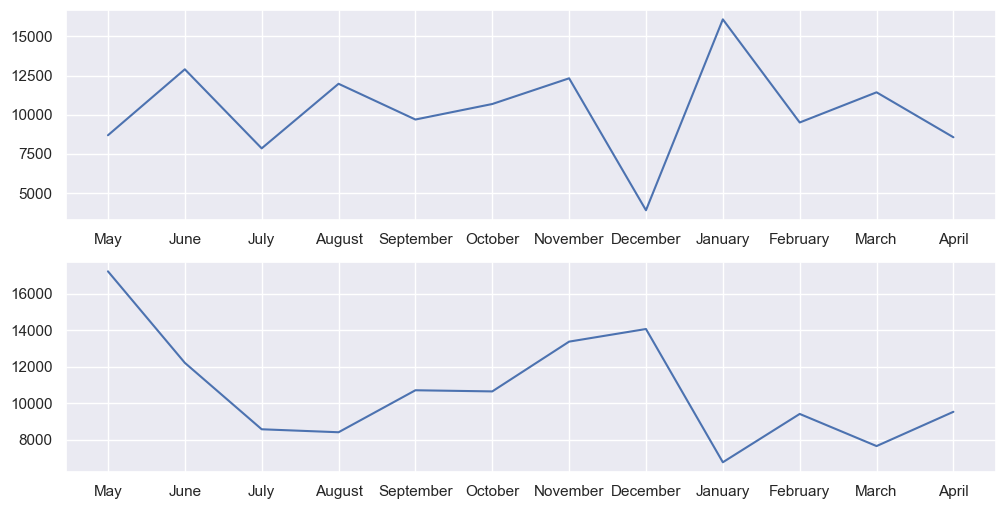

In [117]:
# AVERAGE STEPS BY MONTH_ENCODED
# your code here
week_steps = fitbit.groupby(by= ['Work_or_Weekend'])['Steps'].median()


fig = plt.figure(figsize= (12, 4))
fig, ax = plt.subplots(2,1)
x = fitbit['Months'].unique()
y1 = fitbit[(fitbit['Work_or_Weekend'] == 0)].groupby(['Months'])['Steps'].median()
y2 = fitbit[(fitbit['Work_or_Weekend'] == 1)].groupby(['Months'])['Steps'].median()
#print(x, y1, y2) #testing variables


plt.sca(ax[0])
plt.plot(x, y1)

plt.sca(ax[1])
plt.plot(x, y2)

plt.show() 



In [111]:
week_steps

Work_or_Weekend
0     9998.0
1    10445.5
Name: Steps, dtype: float64

In [112]:
y1

Months
April        13846.5
August       12213.0
December      8531.0
February      9235.0
January      10366.0
July         10644.0
June         12935.5
March        11122.0
May          11998.0
November      9453.5
October       7865.0
September     9343.0
Name: Steps, dtype: float64

#### Write a loop to plot 3 scatter plots of the following features:

* Minutes Lightly Active vs Steps    
* Minutes Very Active vs Steps    
* Minutes Sedentary vs Steps  

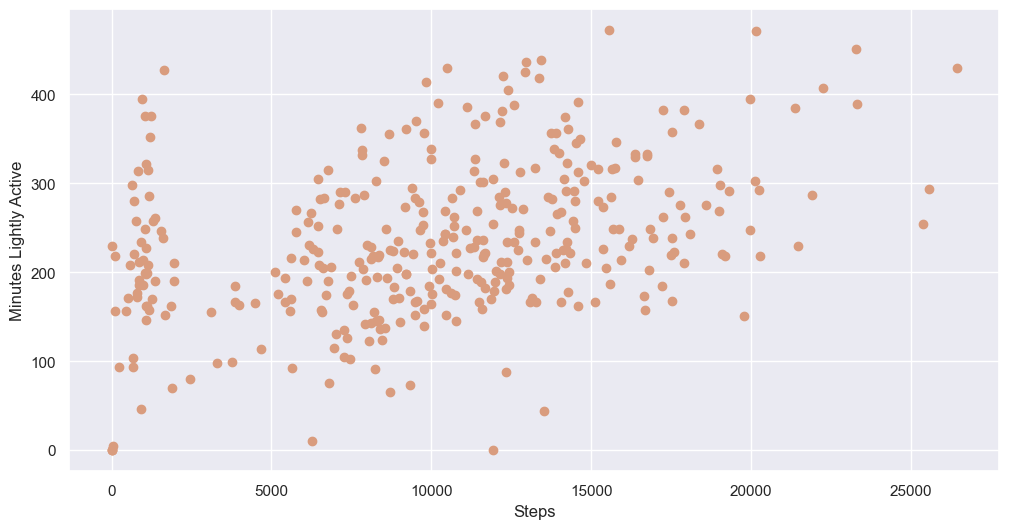

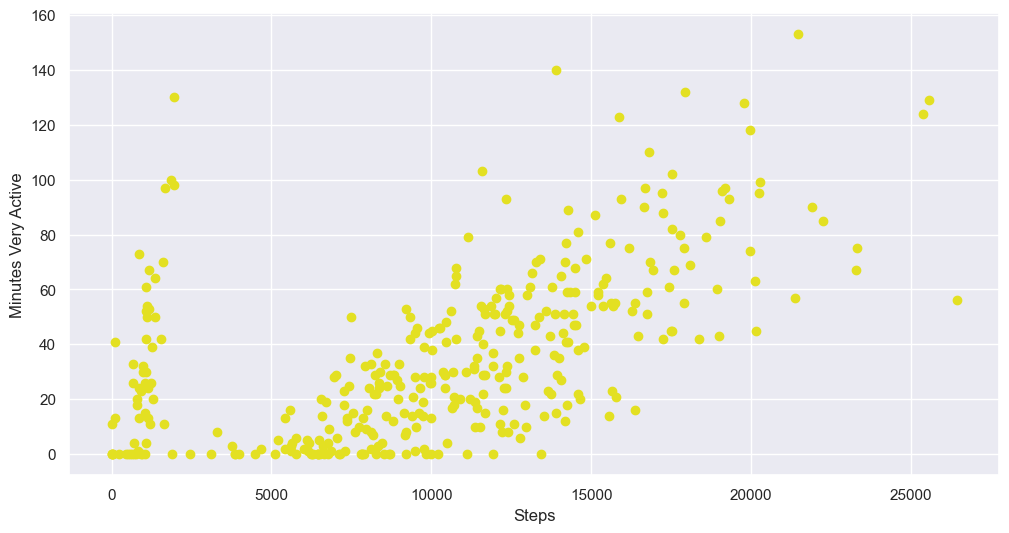

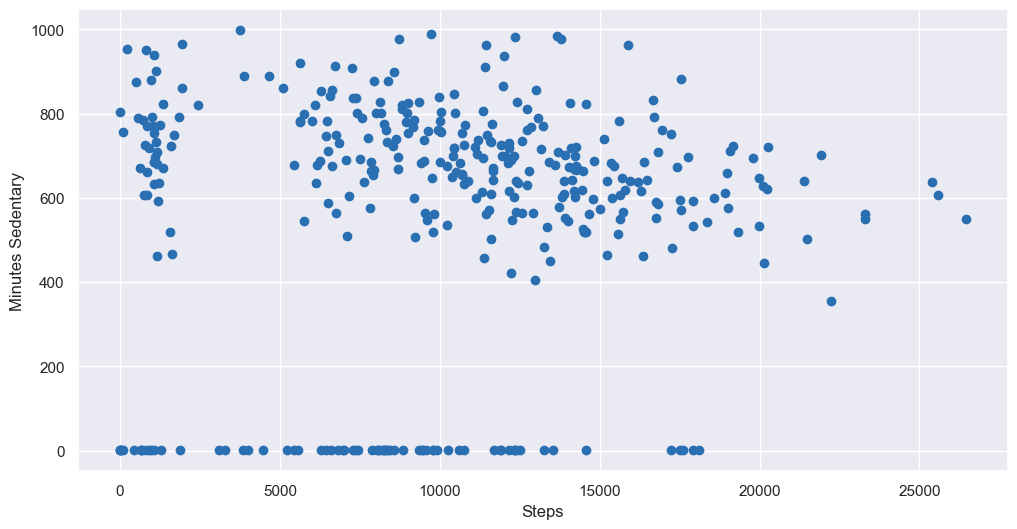

In [118]:
# your code here
cols = ['Minutes Lightly Active', 'Minutes Very Active', 'Minutes Sedentary']

for col in cols:
    plt.figure()
    plt.xlabel('Steps')
    plt.ylabel(col)
    plt.scatter(fitbit['Steps'], fitbit[col], color= np.random.rand(3,))
    plt.savefig(col + '.png', dpi=600)

## Challenge 

#### Import the `titanic` dataset and store it in a variable called `titanic`. You can find the dataset in Ironhack's database:
* db: `titanic`
* table: `titanic`

In [27]:
# your code here
titanic = pd.read_csv('/Users/narea/Desktop/ironhack/labs/lab-matplotlib-seaborn/data/titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U0,S


#### Explore the titanic dataset using Pandas dtypes.

In [28]:
# your code here
titanic.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### What are your numerical variables? What are your categorical variables?
**Hint**: Use Pandas select_dtypes.

In [29]:
# NUMERICAL VARIABLES
# your code here
titanic.select_dtypes(include='number')

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0.0,3,22.000000,1,0,7.2500
1,2,1.0,1,38.000000,1,0,71.2833
2,3,1.0,3,26.000000,0,0,7.9250
3,4,1.0,1,35.000000,1,0,53.1000
4,5,0.0,3,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...
1304,1305,NaN,3,29.513190,0,0,8.0500
1305,1306,NaN,1,39.000000,0,0,108.9000
1306,1307,NaN,3,38.500000,0,0,7.2500
1307,1308,NaN,3,29.513190,0,0,8.0500


In [30]:
# CATEGORICAL VARIABLES
# your code here
titanic.select_dtypes(include='object')

,Name,Gender,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,U0,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,U0,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,U0,S
...,...,...,...,...,...
1304,"Spector, Mr. Woolf",male,A.5. 3236,U0,S
1305,"Oliva y Ocana, Dona. Fermina",female,PC 17758,C105,C
1306,"Saether, Mr. Simon Sivertsen",male,SOTON/O.Q. 3101262,U0,S
1307,"Ware, Mr. Frederick",male,359309,U0,S


#### Set the plot style to classic and the figure size to (12,6).
**Hint**: To set the style you can use matplotlib or seaborn functions. Do some research on the matter.

In [83]:
# your code here
%matplotlib inline
%config Inlinebackend.figure_format = 'retina'

sns.set_context('poster')
sns.set_style('whitegrid')
sns.set_theme(rc = {'figure.figsize':(12,6)})

#### Use the right visulalization to show the distribution of column `Age`.

<AxesSubplot:xlabel='Age', ylabel='Count'>

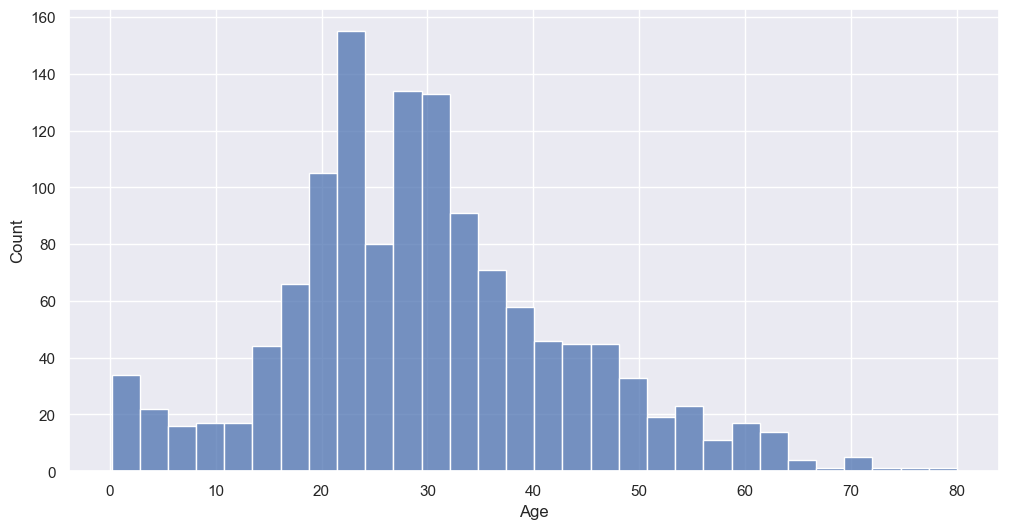

In [84]:
# your code here
sns.histplot(titanic['Age'])

#### Use subplots and plot the distribution of the `Age`  with bins equal to 10, 20 and 50.

<AxesSubplot:ylabel='Frequency'>

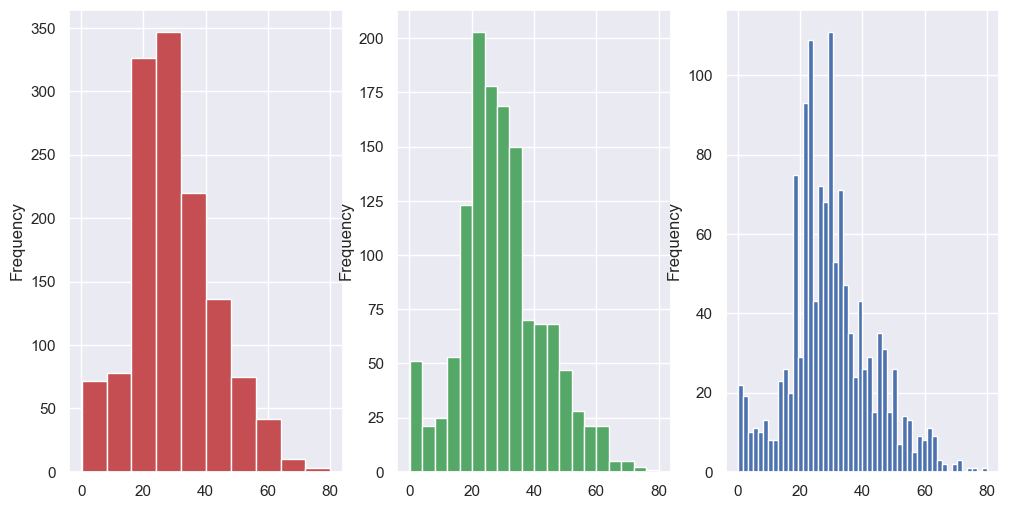

In [121]:
# Set up the matplotlib figure
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12,6))
titanic.Age.plot.hist(bins=10, ax=axs[0], color = 'r')
titanic.Age.plot.hist(bins=20, ax=axs[1], color = 'g')
titanic.Age.plot.hist(bins=50, ax=axs[2], color = 'b')

#### How does the bin size affect your plot?

In [46]:
"""
your comments here
The bigger the bin size the less specific the data gets. For a bin = 10, we get the repetitions 
that occur between those 10 values.
"""


'\nyour comments here\nThe bigger the bin size the less specific the data gets. For a bin = 10, we get the repetitions that occur between those 10 values.\n'

#### Use seaborn to show the distribution of column `Age`.

<AxesSubplot:xlabel='Age', ylabel='Count'>

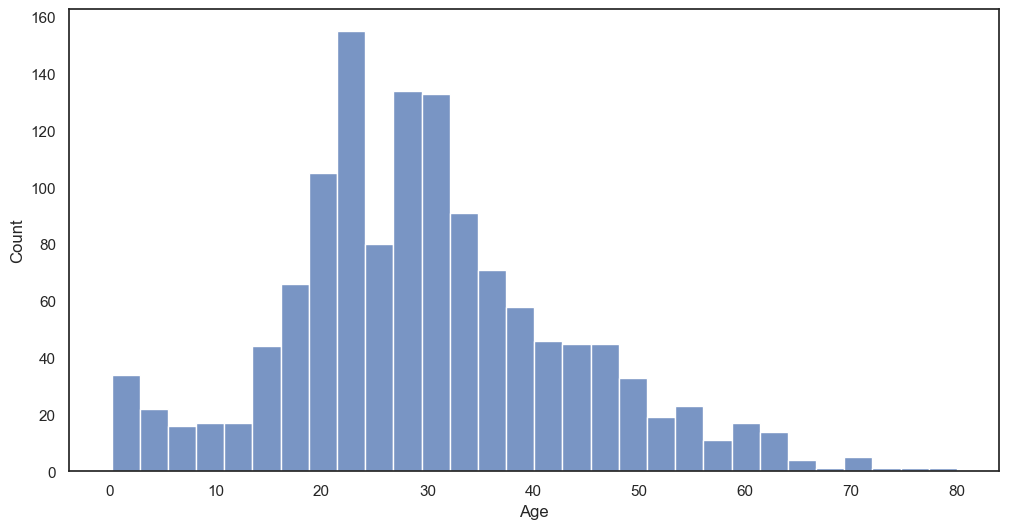

In [50]:
# Same as before
sns.histplot(titanic['Age'])

#### Use the right plot to visualize column `Gender`. There are 2 ways of doing it. Do it both ways.
**Hint**: Use matplotlib and seaborn.

([<matplotlib.patches.Wedge at 0x7fde0fdeea70>,
 [Text(-0.9893411041363958, -0.4808369574670583, 'Male'),
  Text(1.0792811554005672, 0.5245495091954779, 'Female')],
 [Text(-0.5396406022562158, -0.26227470407294085, '64.4%'),
  Text(0.6295806739836642, 0.30598721369736215, '35.6%')])

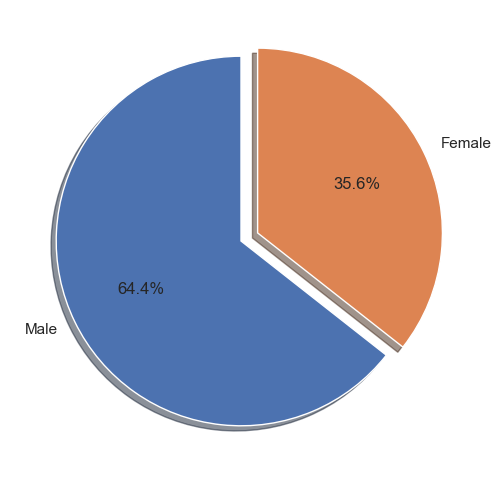

In [122]:
# Method 1 - matplotlib
# your code here
titanic['Gender Code'] = titanic.Gender.cat.codes
gender_ratio = titanic['Gender Code'].value_counts(normalize=True) * 100

plt.figure()
plt.pie(gender_ratios, explode=[0, 0.1], labels=['Male', 'Female'], autopct='%1.1f%%', shadow=True, startangle=90)

<AxesSubplot:xlabel='Gender', ylabel='count'>

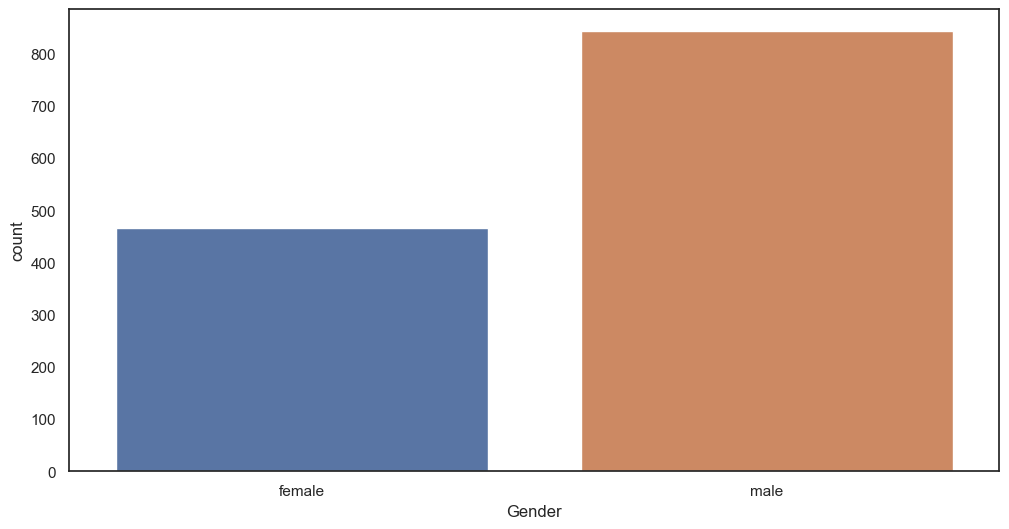

In [54]:
# Method 2 - seaborn
# your code here
sns.countplot(x= titanic.Gender)

#### Use the right plot to visualize the column `Pclass`.

<AxesSubplot:>

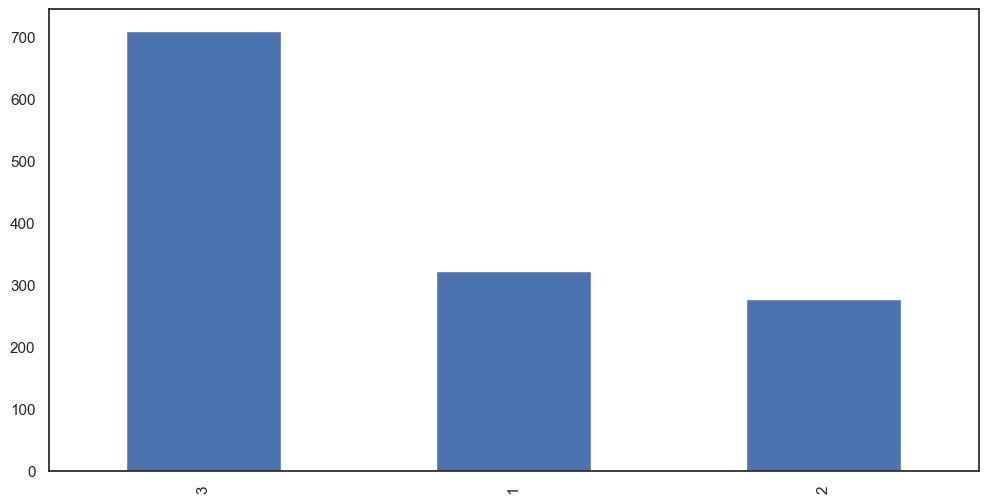

In [63]:
# your code here
titanic['Pclass'].value_counts().plot.bar()

#### We would like to have in one single plot the summary statistics of the feature `Age`. What kind of plot would you use? Plot it. 

{'whiskers': [<matplotlib.lines.Line2D at 0x7fde05bb8460>,
 'caps': [<matplotlib.lines.Line2D at 0x7fde05bb8a00>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fde0524a2c0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fde05bb8fa0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fde05bb9270>],
 'means': []}

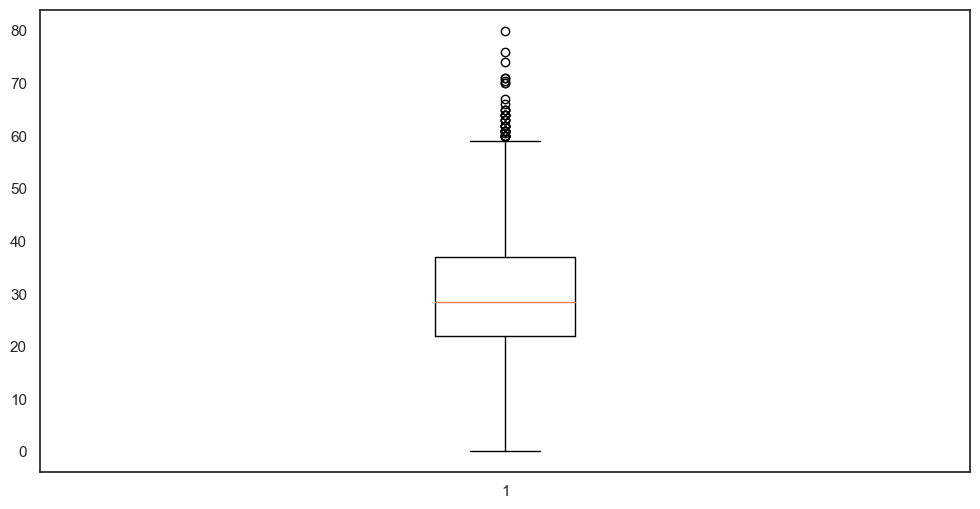

In [64]:
# your code here
plt.boxplot(titanic.Age)

In [123]:
"""
your comments here

I used a boxplot because it tells us the median, the outliers, and divides the data by quartiles.

"""

'\nyour comments here\n\nI used a boxplot because it tells us the median, the outliers, and divides the data by quartiles.\n\n'

#### What does the last plot tell you about the feature `Age`?

In [ ]:
"""
your comments here

We can see the median age in the boat was quite low, around 30 years, and that anyone above 60 was an outlier. 

"""

#### Now in addition to the summary statistics, we want to have in the same plot the distribution of `Age`. What kind of plot would you use? Plot it. 

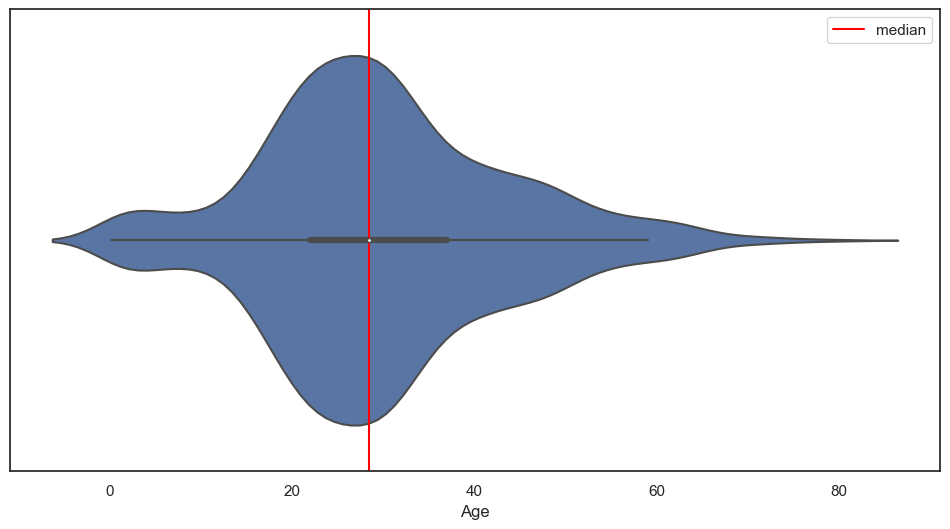

In [69]:
# your code here
violin = sns.violinplot(x=titanic.Age)
violin.axvline(x=titanic.Age.median(), c="red", label="median")
plt.legend()

#### What additional information does the last plot provide about feature `Age`?

In [ ]:
"""
your comments here

In addition to the summary statistic it gives us the distribution of all the data points.

"""

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
**Hint**: Use matplotlib and seaborn.

#### Plot the correlation matrix using seaborn.

<AxesSubplot:>

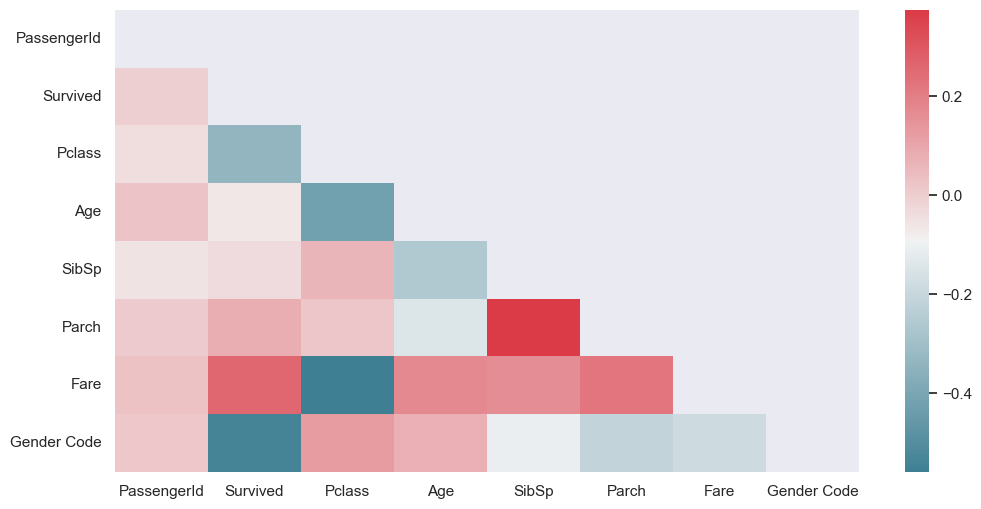

In [86]:
# your code here
corr_mat = titanic.corr()

mask = np.triu(np.ones_like(corr_mat, dtype=bool))
# choosing colors
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr_mat, cmap=cmap, mask=mask)

#### What are the most correlated features?

In [ ]:
"""
your comments here
SibSp and parch are the most correlated.

"""

#### Use the most appropriate plot to display the summary statistics of `Age` depending on `Pclass`.

{'whiskers': [<matplotlib.lines.Line2D at 0x7fde06bfc430>,
 'caps': [<matplotlib.lines.Line2D at 0x7fde06bfc9d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fde06bfc160>,
 'medians': [<matplotlib.lines.Line2D at 0x7fde06bfcf70>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fde06bfd240>,
 'means': []}

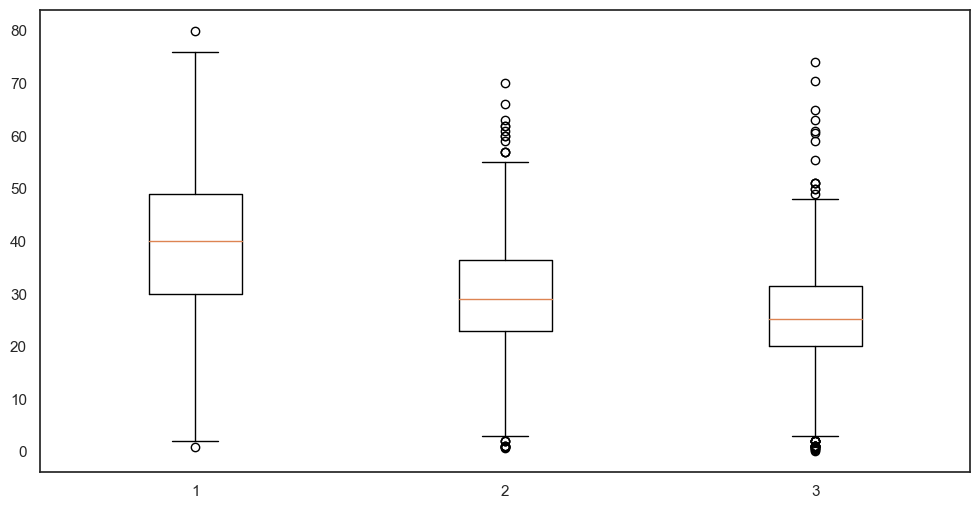

In [72]:
# your code here

plt.boxplot([titanic.loc[titanic['Pclass'] == 1, 'Age'], titanic.loc[titanic['Pclass'] == 2, 'Age'], titanic.loc[titanic['Pclass'] == 3, 'Age']])

#### Use seaborn to plot the distribution of `Age` based on the `Gender`.
**Hint**: Use Facetgrid.

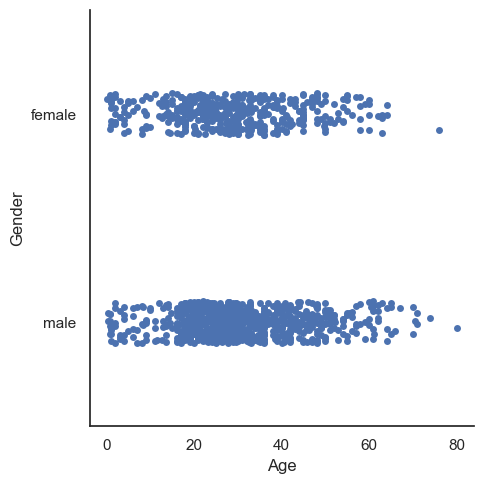

In [73]:
# your code here
sns.catplot(x="Age", y="Gender", data=titanic)
